In [1]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data
allData = pd.read_csv(r"https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/csv players_brazil_15_20_v1 - merged_players.csv")
#allData = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\SemesterProject\Project\data\Eric_Brazil\csv players_brazil_15_20_v1 - merged_players.csv")
#df_new = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\SemesterProject\Project\data\Eric_Brazil\csv players_brazil_15_20_v1 - merged_players.csv")
df_new = pd.read_csv(r"https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/csv players_brazil_15_20_v1 - merged_players.csv")

In [3]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt# Used for data storage and manipulation 
import numpy as np
import pandas as pd# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score# For stepwise regression
import statsmodels.api as sm# box plots
import seaborn as sns
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [4]:
# Store needed columns from final into new dataframe named df
df = allData[['sofifa_id', 'physic', 'pace', 'shooting', 'dribbling', 'passing', 'defending', 'international_reputation','height_cm' ,'weight_kg','age', 'value_eur','potential', 'overall']]# Check out our new df

In [5]:
# Need to convert three columns to  float64 Dtype
df['sofifa_id'] = df['sofifa_id'].astype('float64')
df['international_reputation'] = df['international_reputation'].astype('float64')
df['height_cm'] = df['height_cm'].astype('float64')
df['weight_kg'] = df['weight_kg'].astype('float64')
df['age'] = df['age'].astype('float64')
df['value_eur'] = df['value_eur'].astype('float64')
df['potential'] = df['potential'].astype('float64')
df['overall'] = df['overall'].astype('float64')

<ipython-input-5-d31d5d960ef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sofifa_id'] = df['sofifa_id'].astype('float64')
<ipython-input-5-d31d5d960ef2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international_reputation'] = df['international_reputation'].astype('float64')
<ipython-input-5-d31d5d960ef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [6]:
#replace na with 0
df = df.replace(np.nan, 0)

In [7]:
#correlation coefficient, closer to 1 or -1 better
corr = df.corr()
corr['overall']

sofifa_id                  -0.369888
physic                      0.170639
pace                        0.124157
shooting                    0.215751
dribbling                   0.226966
passing                     0.265954
defending                   0.213632
international_reputation    0.563724
height_cm                   0.010418
weight_kg                   0.041050
age                         0.174653
value_eur                   0.641934
potential                   0.827021
overall                     1.000000
Name: overall, dtype: float64

In [8]:
X = pd.DataFrame(df, columns = ['potential', 'value_eur', 'international_reputation', 'passing'])
y = pd.DataFrame(df, columns=['overall'])# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Create linear regression model
lin_reg_mod = LinearRegression()# Fit linear regression
lin_reg_mod.fit(X_train, y_train)# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [10]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# The closer towards 1, the better the fit
print(test_set_r2)

0.7412897604557265


In [11]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

2.997117345657622


In [12]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['overall']) - abs(df_results['Predicted'])
print(df_results)

      overall  Predicted  Residuals
301      74.0  69.855133   4.144867
495      80.0  79.087082   0.912918
3033     70.0  68.250325   1.749675
2854     67.0  65.398135   1.601865
836      67.0  66.352302   0.647698
...       ...        ...        ...
3075     65.0  64.853865   0.146135
3947     66.0  65.790322   0.209678
1246     82.0  84.840553  -2.840553
3781     67.0  66.279184   0.720816
2473     72.0  69.512443   2.487557

[1071 rows x 3 columns]


<ipython-input-12-43cc2a5670b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-12-43cc2a5670b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['overall']) - abs(df_results['Predicted'])


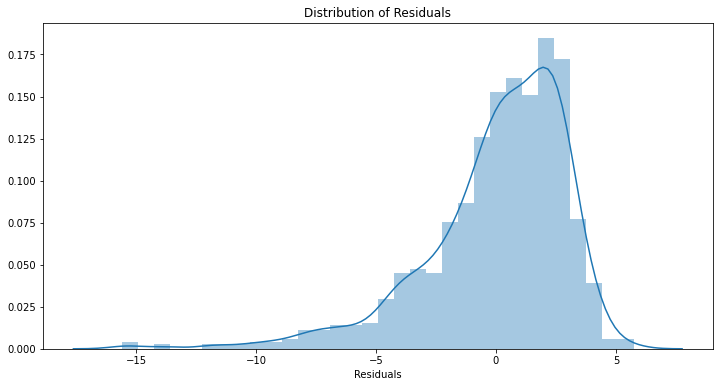

In [13]:
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

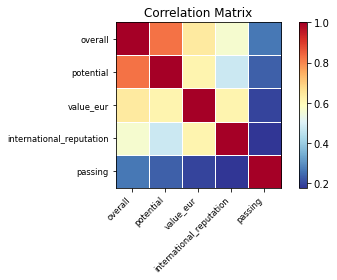

In [14]:
# Put three used columns into a new data framed named df2
df2 = df[['overall', 'potential', 'value_eur', 'international_reputation', 'passing']]# Put the correlations into corr2
corr2 = df2.corr()# Create Correlation Matrix
fig= plot_corr(corr2,xnames=corr2.columns)

In [15]:
#Predicting player positions via variables (height, weight, preferred foot, etc)
#Random Forest classifier
fifa = allData
#Just to fill out a new column for later
fifa['position'] = fifa['age']

In [16]:
#For each prefered position, mark the position column with the appropriate label
cb = pd.DataFrame(fifa.loc[(fifa["player_positions"].str.contains('CB', regex=False)==True)])
cb['position'] = 0

wb = pd.DataFrame(fifa.loc[(fifa["player_positions"].str.contains('RB', regex=False)==True)|(fifa["player_positions"].str.contains('LB', regex=False)==True)|(fifa["player_positions"].str.contains('RWB', regex=False)==True)|(fifa["player_positions"].str.contains('LWB', regex=False)==True)])
wb['position'] = 1

mid = pd.DataFrame(fifa.loc[(fifa["player_positions"].str.contains('CDM', regex=False)==True)|(fifa["player_positions"].str.contains('CM', regex=False)==True)|(fifa["player_positions"].str.contains('CAM', regex=False)==True)])
mid['position'] = 2

wingers = pd.DataFrame(fifa.loc[(fifa["player_positions"].str.contains('LM', regex=False)==True)|(fifa["player_positions"].str.contains('RM', regex=False)==True)|(fifa["player_positions"].str.contains('LW', regex=False)==True)|(fifa["player_positions"].str.contains('RW', regex=False)==True)])
wingers['position'] = 3

st = pd.DataFrame(fifa.loc[(fifa["player_positions"].str.contains('ST', regex=False)==True)|(fifa["player_positions"].str.contains('CF', regex=False)==True)])
st['position'] = 4

In [17]:
#Pare down the data to what we just need. 
data = [cb,wb,st,mid, wingers]
result = pd.concat(data)
result = result.sort_values('overall', ascending=False)
result = result.drop_duplicates('sofifa_id')
fifa = result.loc[:,["position", "sofifa_id","long_name","age","height_cm" ,"weight_kg",
                       "overall", "potential", "value_eur", "international_reputation", "weak_foot", "skill_moves", "pace","shooting","passing","dribbling","defending","physic"]]

In [18]:
#This use grid search to find optimal parameters
data = fifa.iloc[:, 4:33]
labels = fifa["position"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

features_train, features_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 500,criterion = 'entropy', min_samples_split = 2,min_samples_leaf = 5, max_depth=20)
rnd_clf.fit(features_train, labels_train)
pred = rnd_clf.predict(features_test)
print(accuracy_score(labels_test,pred))
target_names = ['cb', 'wb', 'mid','wing','st']
print(classification_report(labels_test,pred, target_names = target_names))

0.6821345707656613
              precision    recall  f1-score   support

          cb       0.77      0.91      0.84        67
          wb       0.66      0.53      0.58        72
         mid       0.63      0.73      0.67       131
        wing       0.53      0.51      0.52        65
          st       0.83      0.70      0.76        96

    accuracy                           0.68       431
   macro avg       0.68      0.67      0.67       431
weighted avg       0.69      0.68      0.68       431



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(.5, 1))

features = scaler.fit_transform(rnd_clf.feature_importances_.reshape(-1,1))
i = 0
color_list = []
while i<len(features):
    #pace colors
    if i<2:
        arr = (features[i],features[i]*0,features[i]*.4)
        color_list.append(arr)
    #shooting colors
    elif i<8:
        arr = (features[i],features[i],features[i]*0)
        color_list.append(arr)
    #passing colors
    elif i<14:
        arr = (features[i]*.1,features[i],features[i])
        color_list.append(arr)
    #dribbling colors
    elif i<20:
        arr = (features[i]*.5,features[i]*0,features[i])
        color_list.append(arr)
    #defending colors
    elif i<25:
        arr = (features[i],features[i]*.3,features[i]*.0)
        color_list.append(arr)
    #physical colors
    elif i<29:
        arr = (features[i]*0,features[i]*.8,features[i]*0)
        color_list.append(arr)
    i+=1
color_list = np.array(color_list)
color_list =color_list.reshape(len(rnd_clf.feature_importances_),3) 

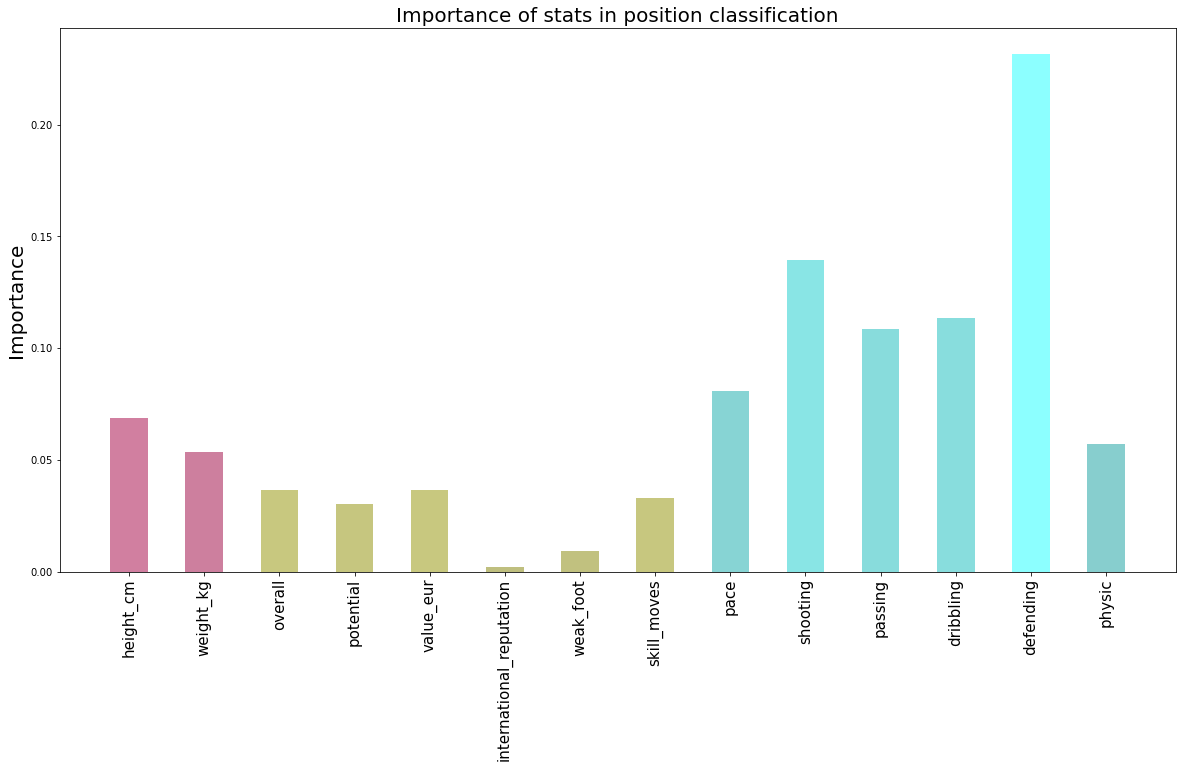

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

width = 0.5
graph_labels = data.columns.values

fig, ax = plt.subplots(figsize=(20, 10))

ind = np.arange(len(graph_labels))
test = ax.bar(ind, rnd_clf.feature_importances_, width, align='center', alpha=0.5, color = color_list)
ax.set_xticks(ind)
ax.set_xticklabels(graph_labels,rotation=90, fontsize=15)
ax.set_ylabel('Importance',fontsize=20)
ax.set_title('Importance of stats in position classification',fontsize=20)
plt.show()